In [1]:
import os
import gc
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

In [2]:
# -*- coding: utf-8 -*-  
def listdir(path: str, list_name: list):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isdir(file_path):
            listdir(file_path, list_name)
        elif os.path.splitext(file_path)[1] == '.wav':
            list_name.append(file_path)
    return list_name

In [3]:
list_name = list()
list_name = listdir('RawData/CASIA database', list_name)

In [4]:
len(list_name)

1200

In [5]:
list_name

['RawData/CASIA database\\liuchanhg\\angry\\201.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\202.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\203.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\204.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\205.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\206.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\207.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\208.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\209.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\210.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\211.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\212.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\213.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\214.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\215.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\216.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\217.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\218.wav',
 'RawData/CASIA database\\li

In [6]:
label_list = list()
for i in range(len(list_name)):
    #     print(list_name)
    name = list_name[i]
    if "liuchanhg" in name:
        label_list.append("liuchanhg")
    if "wangzhe" in name:
        label_list.append("wangzhe")
    if "zhaoquanyin" in name:
        label_list.append("zhaoquanyin")
    if "ZhaoZuoxiang" in name:
        label_list.append("ZhaoZuoxiang")

In [7]:
len(label_list)

1200

In [8]:
label_list

['liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuc

In [9]:
labels = pd.DataFrame(label_list)

In [10]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index, y in enumerate(list_name):
    X, sample_rate = librosa.load(y, res_type='kaiser_fast', duration=2.5, sr=22050 * 2, offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark = bookmark + 1

In [11]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [12]:
newdf = pd.concat([df3, labels], axis=1)

In [13]:
rnewdf = shuffle(newdf)
rnewdf = rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1177,-16.110868,-14.390507,-14.689881,-12.349155,-13.679718,-13.023459,-10.439987,-11.664656,-15.165203,-15.127192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZhaoZuoxiang
555,2.610677,4.004098,0.654362,-4.209569,-6.322399,-7.693866,-6.017402,-6.394326,-7.116290,-6.853881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wangzhe
115,-6.199959,-11.072369,-26.457083,-28.305119,-31.274101,-31.295561,-29.633583,-20.450605,-15.354208,-14.384012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,liuchanhg
25,-8.651799,-11.725632,-20.407625,-18.591139,-18.977406,-17.741470,-20.860199,-17.547781,-7.301459,-5.248096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,liuchanhg
1153,-31.202305,-32.902096,-32.431389,-33.304325,-33.346188,-32.622623,-32.750008,-32.958042,-32.619003,-23.494120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZhaoZuoxiang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,-26.899752,-30.421251,-35.251541,-34.222946,-36.984779,-37.140568,-36.905560,-36.449871,-38.590469,-37.586544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZhaoZuoxiang
183,-9.742373,-12.764927,-20.207058,-22.516584,-25.772024,-30.622375,-32.493011,-24.103117,-11.869847,-9.608392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,liuchanhg
106,-21.311848,-20.053856,-20.929688,-20.733921,-21.721365,-18.995838,-14.419722,-15.933097,-18.499462,-21.430082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,liuchanhg
205,-32.305870,-25.076252,-6.924939,-0.163537,-1.985729,-8.289581,-13.411245,-15.412608,-15.979558,-16.116575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,liuchanhg


In [14]:
features = rnewdf.iloc[:, :-1]
labels = rnewdf.iloc[:, -1:]

In [15]:
features

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1177,-16.110868,-14.390507,-14.689881,-12.349155,-13.679718,-13.023459,-10.439987,-11.664656,-15.165203,-15.127192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,2.610677,4.004098,0.654362,-4.209569,-6.322399,-7.693866,-6.017402,-6.394326,-7.116290,-6.853881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,-6.199959,-11.072369,-26.457083,-28.305119,-31.274101,-31.295561,-29.633583,-20.450605,-15.354208,-14.384012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,-8.651799,-11.725632,-20.407625,-18.591139,-18.977406,-17.741470,-20.860199,-17.547781,-7.301459,-5.248096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1153,-31.202305,-32.902096,-32.431389,-33.304325,-33.346188,-32.622623,-32.750008,-32.958042,-32.619003,-23.494120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,-26.899752,-30.421251,-35.251541,-34.222946,-36.984779,-37.140568,-36.905560,-36.449871,-38.590469,-37.586544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,-9.742373,-12.764927,-20.207058,-22.516584,-25.772024,-30.622375,-32.493011,-24.103117,-11.869847,-9.608392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,-21.311848,-20.053856,-20.929688,-20.733921,-21.721365,-18.995838,-14.419722,-15.933097,-18.499462,-21.430082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,-32.305870,-25.076252,-6.924939,-0.163537,-1.985729,-8.289581,-13.411245,-15.412608,-15.979558,-16.116575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
labels

,0
1177,ZhaoZuoxiang
555,wangzhe
115,liuchanhg
25,liuchanhg
1153,ZhaoZuoxiang
...,...
953,ZhaoZuoxiang
183,liuchanhg
106,liuchanhg
205,liuchanhg


In [17]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True, random_state=1)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(720, 216)
(240, 216)
(240, 216)
(720, 1)
(240, 1)
(240, 1)


In [19]:
lb = LabelEncoder()

X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_val = np_utils.to_categorical(lb.fit_transform(y_val))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

D:\Applications\Python\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
model = Sequential()

model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
opt = optimizers.Adam(learning_rate=0.00001, decay=1e-6)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout (Dropout)           (None, 216, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                        

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
cnnhistory = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
6/6 [==============================] - 2s 284ms/step - loss: 1.4905 - accuracy: 0.2833 - val_loss: 1.4470 - val_accuracy: 0.2792
Epoch 2/500
6/6 [==============================] - 1s 233ms/step - loss: 1.4141 - accuracy: 0.3042 - val_loss: 1.3851 - val_accuracy: 0.3333
Epoch 3/500
6/6 [==============================] - 2s 254ms/step - loss: 1.3504 - accuracy: 0.3569 - val_loss: 1.3426 - val_accuracy: 0.3583
Epoch 4/500
6/6 [==============================] - 2s 256ms/step - loss: 1.3117 - accuracy: 0.3875 - val_loss: 1.3095 - val_accuracy: 0.4083
Epoch 5/500
6/6 [==============================] - 2s 296ms/step - loss: 1.2772 - accuracy: 0.4139 - val_loss: 1.2842 - val_accuracy: 0.4417
Epoch 6/500
6/6 [==============================] - 2s 291ms/step - loss: 1.2505 - accuracy: 0.4403 - val_loss: 1.2640 - val_accuracy: 0.4333
Epoch 7/500
6/6 [==============================] - 2s 283ms/step - loss: 1.2291 - accuracy: 0.4444 - val_loss: 1.2453 - val_accuracy: 0.4625
Epoch 8/500
6

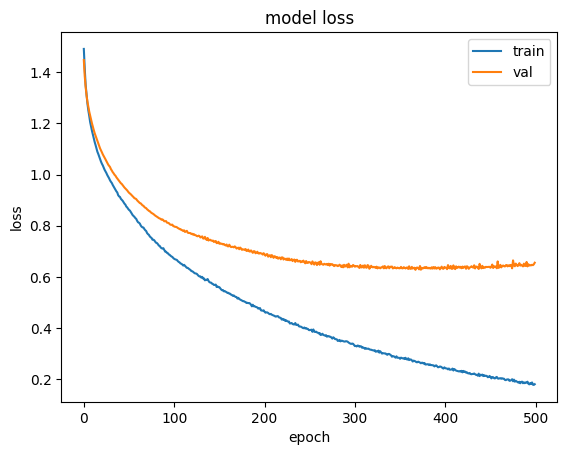

In [24]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

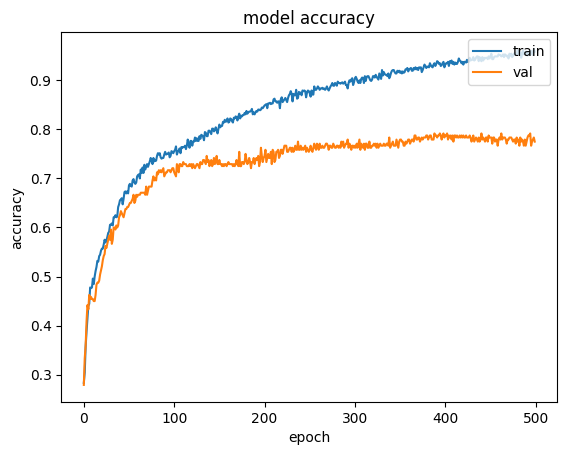

In [25]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [26]:
model_name = 'model.h5'
save_dir = os.path.join(os.getcwd(), 'models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\1A\Python lab\2022-Fall-Chinese-Information-Processing\models\model.h5 


In [27]:
model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)

In [28]:
# loading json and creating model
from keras.models import model_from_json

json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

Loaded model from disk
accuracy: 75.00%


In [29]:
preds = loaded_model.predict(X_test, batch_size=32, verbose=1)
preds

8/8 [==============================] - 0s 19ms/step


array([[9.91879106e-01, 3.78242512e-05, 1.20952241e-11, 8.08305293e-03],
       [5.37330247e-02, 1.53029472e-01, 4.84882802e-01, 3.08354765e-01],
       [3.53042148e-02, 9.08344626e-01, 1.81793869e-02, 3.81717756e-02],
       [4.40870970e-03, 2.80711323e-01, 7.13225782e-01, 1.65411853e-03],
       [2.45966949e-02, 6.92404032e-01, 2.78811306e-01, 4.18798393e-03],
       [1.06056072e-02, 6.73365593e-01, 2.14093372e-01, 1.01935491e-01],
       [6.92716194e-03, 3.75977233e-02, 9.55246627e-01, 2.28458928e-04],
       [9.12383199e-01, 5.30720837e-02, 1.16445888e-04, 3.44282836e-02],
       [6.86858722e-04, 1.03333518e-02, 9.88115430e-01, 8.64363799e-04],
       [9.82910045e-04, 6.06258929e-01, 2.91806571e-02, 3.63577515e-01],
       [9.80398804e-03, 4.79474515e-02, 9.32330549e-01, 9.91796423e-03],
       [4.68626246e-03, 5.86569915e-03, 9.85044003e-01, 4.40401956e-03],
       [5.17381467e-02, 5.02228625e-02, 1.29660619e-02, 8.85072947e-01],
       [9.63635087e-01, 1.36937425e-02, 5.78773534e

In [30]:
preds = preds.argmax(axis=1)
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform(preds))
preddf = pd.DataFrame({'predictedvalues': preds})
preddf

,predictedvalues
0,ZhaoZuoxiang
1,wangzhe
2,liuchanhg
3,wangzhe
4,liuchanhg
...,...
235,zhaoquanyin
236,ZhaoZuoxiang
237,ZhaoZuoxiang
238,liuchanhg


In [31]:
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform(actual))
actualdf = pd.DataFrame({'actualvalues': actual})
actualdf

,actualvalues
0,ZhaoZuoxiang
1,wangzhe
2,liuchanhg
3,wangzhe
4,liuchanhg
...,...
235,zhaoquanyin
236,ZhaoZuoxiang
237,ZhaoZuoxiang
238,liuchanhg


In [32]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,ZhaoZuoxiang,ZhaoZuoxiang
1,wangzhe,wangzhe
2,liuchanhg,liuchanhg
3,wangzhe,wangzhe
4,liuchanhg,liuchanhg
...,...,...
235,zhaoquanyin,zhaoquanyin
236,ZhaoZuoxiang,ZhaoZuoxiang
237,ZhaoZuoxiang,ZhaoZuoxiang
238,liuchanhg,liuchanhg


In [33]:
finaldf.to_csv('result.csv', index=False)

In [34]:
gc.collect()

652